In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [82]:
iris = load_iris()

In [83]:
x = iris.data
y = iris.target

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=4,shuffle=True)

In [85]:
print("Xtrain - ",xtrain.shape)
print("Ytrain - ",ytrain.shape)
print("Xtest - ",xtest.shape)
print("Ytest - ",ytest.shape)

Xtrain -  (135, 4)
Ytrain -  (135,)
Xtest -  (15, 4)
Ytest -  (15,)


In [86]:
xtest

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ]])

In [87]:
kf = KFold(11)

In [88]:
for train, test in kf.split(['a','b','c','d','e','f','g','h','i','j','k']):
    print(train,test)

[ 1  2  3  4  5  6  7  8  9 10] [0]
[ 0  2  3  4  5  6  7  8  9 10] [1]
[ 0  1  3  4  5  6  7  8  9 10] [2]
[ 0  1  2  4  5  6  7  8  9 10] [3]
[ 0  1  2  3  5  6  7  8  9 10] [4]
[ 0  1  2  3  4  6  7  8  9 10] [5]
[ 0  1  2  3  4  5  7  8  9 10] [6]
[ 0  1  2  3  4  5  6  8  9 10] [7]
[ 0  1  2  3  4  5  6  7  9 10] [8]
[ 0  1  2  3  4  5  6  7  8 10] [9]
[0 1 2 3 4 5 6 7 8 9] [10]


In [89]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [90]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(xtrain,ytrain)
pred = deci_tree.predict(xtest)

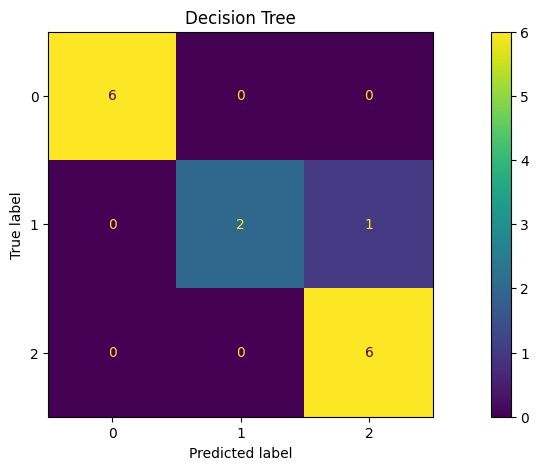

In [91]:
fig, (ax1) =plt.subplots()
fig.set_size_inches(15,5)

ax1.set_title("Decision Tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,xtest,ytest,ax=ax1)

In [92]:
print("Accuracy on the test data ")
dt_acc_hldout=accuracy_score(ytest,pred)
print(f"Decision tree accuracy : {dt_acc_hldout * 100}%")
print("\nClassification Report on the test data")
print(classification_report(ytest,pred))

Accuracy on the test data 
Decision tree accuracy : 93.33333333333333%

Classification Report on the test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         3
           2       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.89      0.91        15
weighted avg       0.94      0.93      0.93        15



[Text(0.5, 0.9, 'pw <= 0.8\nentropy = 1.584\nsamples = 135\nvalue = [44, 47, 44]\nclass = versicolor'),
 Text(0.4230769230769231, 0.7, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'pw <= 1.75\nentropy = 0.999\nsamples = 91\nvalue = [0, 47, 44]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5, 'pl <= 4.95\nentropy = 0.402\nsamples = 50\nvalue = [0, 46, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'pw <= 1.65\nentropy = 0.151\nsamples = 46\nvalue = [0, 45, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginca'),
 Text(0.46153846153846156, 0.3, 'pw <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginca'),
 Text(0.38461538461538464, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginca'),
 Text(0.5384615384615384, 

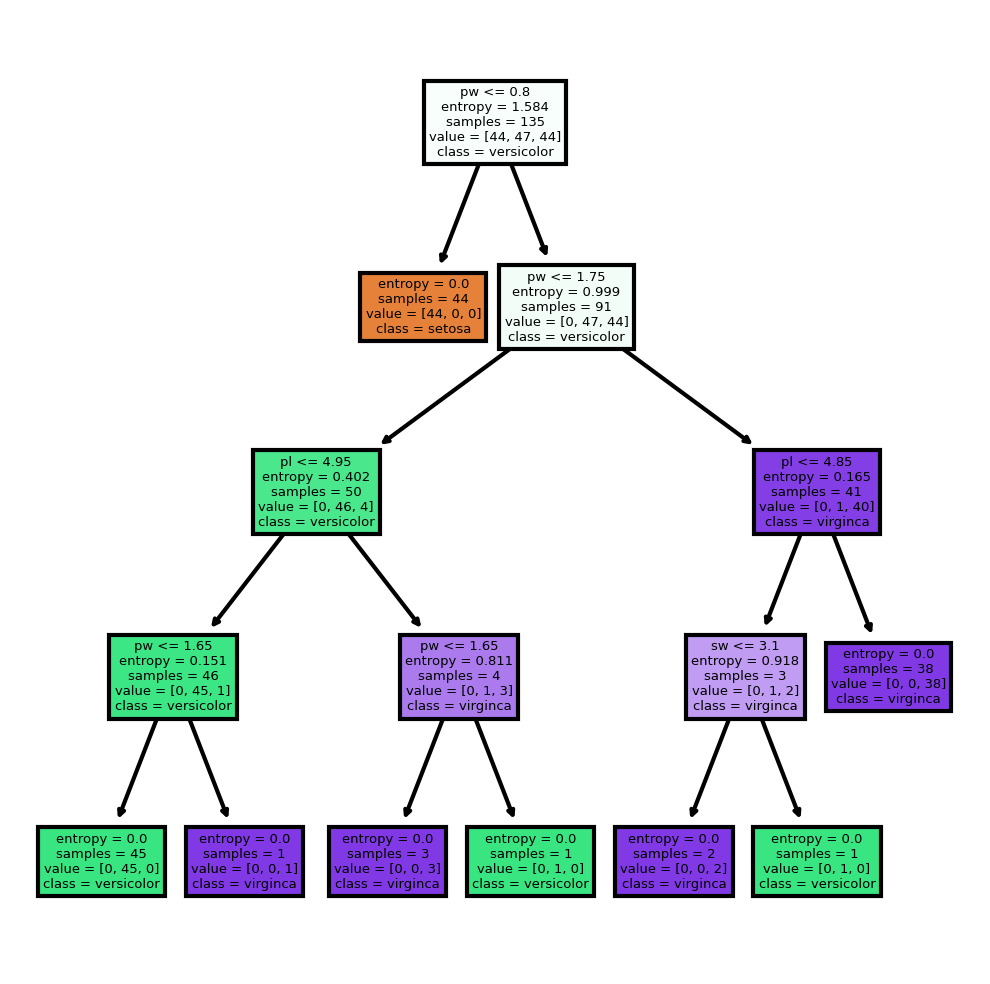

In [93]:
from sklearn import tree
fn=['sl','sw','pl','pw']
cn=['setosa','versicolor','virginca']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(deci_tree,feature_names=fn,class_names=cn,filled=True)

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
gn = GaussianNB()

In [96]:
y_pred = gn.fit(xtrain, ytrain).predict(xtest)

In [97]:
print("Number of wrong points out of a total %d points : %d"
      % (xtest.shape[0], (ytest != y_pred).sum()))

Number of wrong points out of a total 15 points : 1


In [98]:
print("Accuracy for Naive-Bayes is : ",accuracy_score(y_pred,ytest))
print(classification_report(ytest,y_pred))

Accuracy for Naive-Bayes is :  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [101]:
predicted = knn.predict(xtest)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(ytest)

Predictions from the classifier:
[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2]
Target values:
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2]


In [102]:
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

# knn.fit(xtrain, ytrain)
print("Accuracy is for KNN is : ",accuracy_score(predicted, ytest))

Accuracy is for KNN is :  0.9333333333333333


# Breast Cancer Wiscoin

In [103]:
import pandas as pd
c = pd.read_csv('cancer.csv')
c

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [104]:
x1 = c.drop(columns=['id','diagnosis'])
x1 = x1.dropna(axis=1)
x1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
y1 = c['diagnosis']
y1

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [106]:
xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)

In [107]:
print("Xtrain - ",xtr.shape)
print("Ytrain - ",ytr.shape)
print("Xtest - ",xte.shape)
print("Ytest - ",yte.shape)

Xtrain -  (512, 30)
Ytrain -  (512,)
Xtest -  (57, 30)
Ytest -  (57,)


In [108]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtr,ytr)
pred = dt.predict(xte)

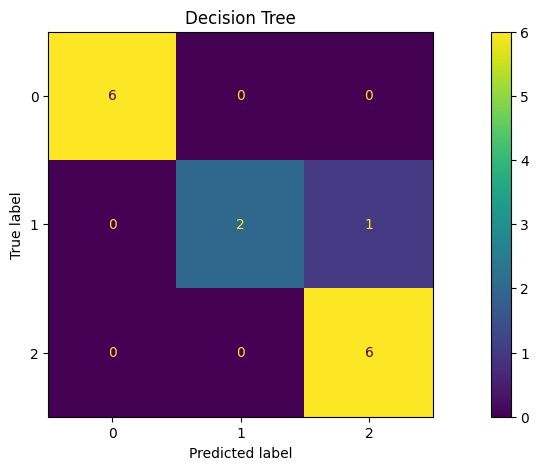

In [109]:
fig, (ax1) =plt.subplots()
fig.set_size_inches(15,5)

ax1.set_title("Decision Tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,xtest,ytest,ax=ax1)

In [110]:
print("Accuracy on the test data ")
dt_acc_hldout=accuracy_score(yte,pred)
print(f"Decision tree accuracy : {dt_acc_hldout * 100}%")
print("\nClassification Report on the test data")
print(classification_report(yte,pred))

Accuracy on the test data 
Decision tree accuracy : 85.96491228070175%

Classification Report on the test data
              precision    recall  f1-score   support

           B       0.97      0.83      0.89        41
           M       0.68      0.94      0.79        16

    accuracy                           0.86        57
   macro avg       0.83      0.88      0.84        57
weighted avg       0.89      0.86      0.87        57



[Text(0.5952380952380952, 0.9375, 'perimeter_worst <= 116.05\nentropy = 0.96\nsamples = 512\nvalue = [316, 196]\nclass = M'),
 Text(0.5476190476190477, 0.8125, 'concave points_worst <= 0.111\nentropy = 0.507\nsamples = 356\nvalue = [316, 40]\nclass = M'),
 Text(0.30952380952380953, 0.6875, 'area_mean <= 694.5\nentropy = 0.15\nsamples = 278\nvalue = [272, 6]\nclass = M'),
 Text(0.19047619047619047, 0.5625, 'area_se <= 48.975\nentropy = 0.063\nsamples = 272\nvalue = [270, 2]\nclass = M'),
 Text(0.09523809523809523, 0.4375, 'texture_worst <= 33.27\nentropy = 0.035\nsamples = 269\nvalue = [268, 1]\nclass = M'),
 Text(0.047619047619047616, 0.3125, 'entropy = 0.0\nsamples = 252\nvalue = [252, 0]\nclass = M'),
 Text(0.14285714285714285, 0.3125, 'texture_worst <= 33.8\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]\nclass = M'),
 Text(0.09523809523809523, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.19047619047619047, 0.1875, 'entropy = 0.0\nsamples = 16\nvalue = [

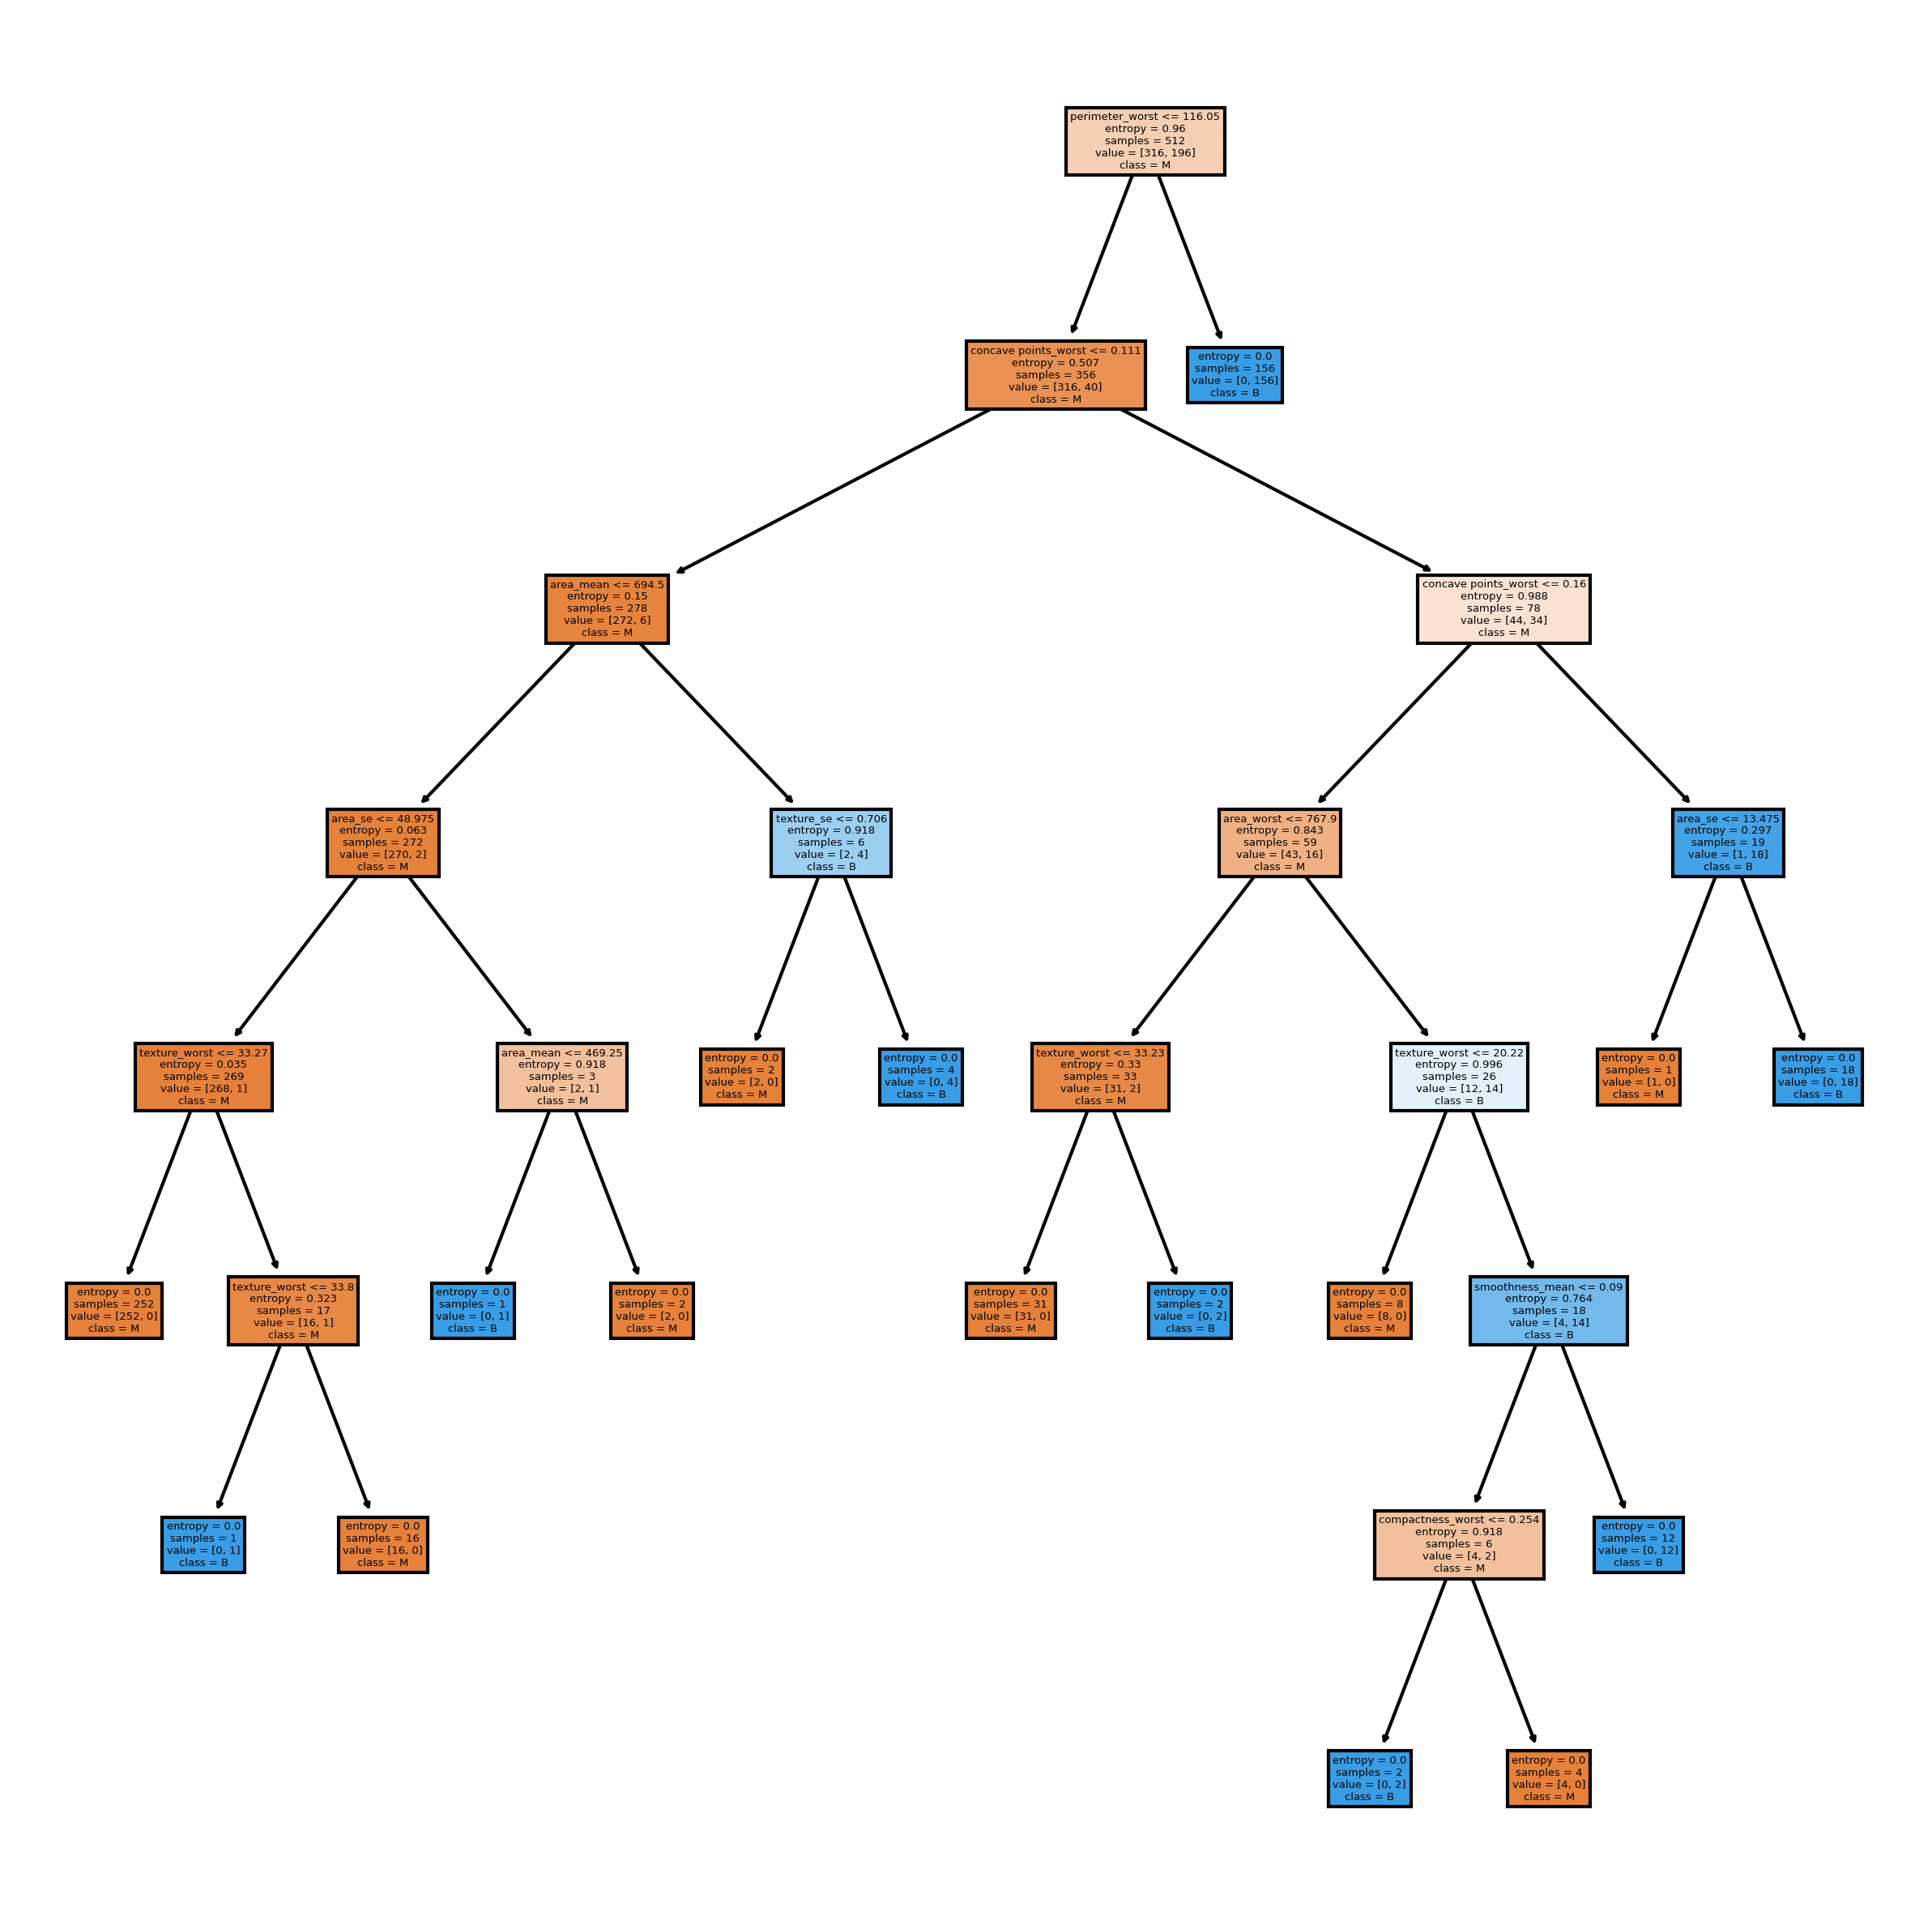

In [111]:
from sklearn import tree
fn1=xtr.columns.tolist()
cn1=['M','B']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(dt,feature_names=fn1,class_names=cn1,filled=True)

In [112]:
ypre2 = gn.fit(xtr, ytr).predict(xte)

In [113]:
print("Number of wrong points out of a total %d points : %d"
      % (xte.shape[0], (yte != ypre2).sum()))

Number of wrong points out of a total 57 points : 6


In [114]:
print("Accuracy for Naive-Bayes is : ",accuracy_score(ypre2,yte))
print(classification_report(yte,ypre2))

Accuracy for Naive-Bayes is :  0.8947368421052632
              precision    recall  f1-score   support

           B       0.95      0.90      0.92        41
           M       0.78      0.88      0.82        16

    accuracy                           0.89        57
   macro avg       0.86      0.89      0.87        57
weighted avg       0.90      0.89      0.90        57



In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier()
knn.fit(xtr, ytr)

KNeighborsClassifier()

In [117]:
predict = knn.predict(xte)
print("Predictions from the classifier:")
print(predict)
print("Target values:")
print(yte.tolist())

Predictions from the classifier:
['B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M']
Target values:
['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M']


In [118]:
knncan = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

# knn.fit(xtrain, ytrain)
print("Accuracy is for KNN is : ",accuracy_score(predict, yte))

Accuracy is for KNN is :  0.8596491228070176


In [122]:
def Average(lst):
    return sum(lst) / len(lst)

acc=[]
for train, test in kf.split(c):
    knn = KNeighborsClassifier()
    knn.fit(xtr, ytr)
    predict = knn.predict(xte)
    a=accuracy_score(predict, yte)
    acc.append(a * 100)
print("Cross KNN : ",Average(acc))

acc=[]
for train, test in kf.split(c):
    dt.fit(xtr, ytr)
    predict = dt.predict(xte)
    a=accuracy_score(predict, yte)
    acc.append(a * 100)
print("Cross Decision : ",Average(acc))

acc=[]
for train, test in kf.split(c):
    gn.fit(xtr, ytr)
    predict = gn.predict(xte)
    a=accuracy_score(predict, yte)
    acc.append(a * 100)
print("Cross NB : ",Average(acc))

Cross KNN :  85.96491228070177
Cross Decision :  85.3269537480064
Cross NB :  89.47368421052634


In [120]:
def Average(lst):
    return sum(lst) / len(lst)

acc=[]
for i in range(100):
    xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
    dt.fit(xtr,ytr)
    pred = dt.predict(xte)
    dt_acc_hldout=accuracy_score(yte,pred)
    acc.append(dt_acc_hldout * 100)
    
print("Random Decision Tree Accuracy : ",Average(acc))

acc=[]
for i in range(100):
    xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
    knn.fit(xtr, ytr)
    predict = knn.predict(xte)
    dt_acc_hldout=accuracy_score(yte,pred)
    acc.append(dt_acc_hldout * 100)
print("Random KNN Accuracy : ",Average(acc))

acc=[]
for i in range(100):
    xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
    dt.fit(xtr,ytr)
    ypre2 = gn.fit(xtr, ytr).predict(xte)
    dt_acc_hldout=accuracy_score(ypre2,yte)
    acc.append(dt_acc_hldout * 100)
print("Random NB Accuracy : ",Average(acc))

Random Decision Tree Accuracy :  85.47368421052617
Random KNN Accuracy :  84.21052631578934
Random NB Accuracy :  89.4736842105265


In [121]:
def Average(lst):
    return sum(lst) / len(lst)

acc=[]
xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
dt.fit(xtr,ytr)
pred = dt.predict(xte)
dt_acc_hldout=accuracy_score(yte,pred)
acc.append(dt_acc_hldout * 100)
print("Holdout Decision Tree Accuracy : ",Average(acc))

acc=[]
xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
knn.fit(xtr, ytr)
predict = knn.predict(xte)
dt_acc_hldout=accuracy_score(yte,pred)
acc.append(dt_acc_hldout * 100)
print("Holdout KNN Accuracy : ",Average(acc))

acc=[]
xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.1,random_state=4,shuffle=True)
dt.fit(xtr,ytr)
ypre2 = gn.fit(xtr, ytr).predict(xte)
dt_acc_hldout=accuracy_score(ypre2,yte)
acc.append(dt_acc_hldout * 100)
print("Holdout NB Accuracy : ",Average(acc))

Holdout Decision Tree Accuracy :  84.21052631578947
Holdout KNN Accuracy :  84.21052631578947
Holdout NB Accuracy :  89.47368421052632
